<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 35: Classifiers

Associated Textbook Sections: [17.4 - 17.6](https://inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

ckd = Table.read_table('ckd.csv')
ckd = ckd.relabeled('Blood Glucose Random', 'Glucose').select('Glucose', 'Hemoglobin', 'White Blood Cell Count', 'Class')

patients = Table.read_table('breast-cancer.csv').drop('ID')

def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-35:-Classifiers" data-toc-modified-id="Lecture-35:-Classifiers-1">Lecture 35: Classifiers</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Classifiers" data-toc-modified-id="Classifiers-1.3">Classifiers</a></span><ul class="toc-item"><li><span><a href="#Training-a-Classifier" data-toc-modified-id="Training-a-Classifier-1.3.1">Training a Classifier</a></span></li><li><span><a href="#Nearest-Neighbor-Classifier" data-toc-modified-id="Nearest-Neighbor-Classifier-1.3.2">Nearest Neighbor Classifier</a></span></li><li><span><a href="#The-Google-Science-Fair" data-toc-modified-id="The-Google-Science-Fair-1.3.3">The Google Science Fair</a></span></li><li><span><a href="#Demo:-Google-Science-Fair" data-toc-modified-id="Demo:-Google-Science-Fair-1.3.4">Demo: Google Science Fair</a></span></li></ul></li><li><span><a href="#Rows" data-toc-modified-id="Rows-1.4">Rows</a></span><ul class="toc-item"><li><span><a href="#Rows-of-Tables" data-toc-modified-id="Rows-of-Tables-1.4.1">Rows of Tables</a></span></li></ul></li><li><span><a href="#Distance" data-toc-modified-id="Distance-1.5">Distance</a></span><ul class="toc-item"><li><span><a href="#Pythagoras'-Formula" data-toc-modified-id="Pythagoras'-Formula-1.5.1">Pythagoras' Formula</a></span></li><li><span><a href="#Distance-Between-Two-Points" data-toc-modified-id="Distance-Between-Two-Points-1.5.2">Distance Between Two Points</a></span></li><li><span><a href="#Demo:-Distance" data-toc-modified-id="Demo:-Distance-1.5.3">Demo: Distance</a></span></li></ul></li><li><span><a href="#Nearest-Neighbors" data-toc-modified-id="Nearest-Neighbors-1.6">Nearest Neighbors</a></span><ul class="toc-item"><li><span><a href="#Finding-the-k-Nearest-Neighbors" data-toc-modified-id="Finding-the-k-Nearest-Neighbors-1.6.1">Finding the <code>k</code> Nearest Neighbors</a></span></li><li><span><a href="#The-Classifier" data-toc-modified-id="The-Classifier-1.6.2">The Classifier</a></span></li><li><span><a href="#Demo:-The-Classifier" data-toc-modified-id="Demo:-The-Classifier-1.6.3">Demo: The Classifier</a></span></li><li><span><a href="#Review-of-the-Steps" data-toc-modified-id="Review-of-the-Steps-1.6.4">Review of the Steps</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.7">Evaluation</a></span><ul class="toc-item"><li><span><a href="#Accuracy-of-a-Classifier" data-toc-modified-id="Accuracy-of-a-Classifier-1.7.1">Accuracy of a Classifier</a></span></li><li><span><a href="#Demo:-Accuracy-of-a-Classifier" data-toc-modified-id="Demo:-Accuracy-of-a-Classifier-1.7.2">Demo: Accuracy of a Classifier</a></span></li></ul></li><li><span><a href="#Before-Classifying" data-toc-modified-id="Before-Classifying-1.8">Before Classifying</a></span><ul class="toc-item"><li><span><a href="#Dog-or-Wolf?" data-toc-modified-id="Dog-or-Wolf?-1.8.1">Dog or Wolf?</a></span></li><li><span><a href="#Start-with-a-Representative-Sample" data-toc-modified-id="Start-with-a-Representative-Sample-1.8.2">Start with a Representative Sample</a></span></li><li><span><a href="#Standardize-if-Necessary" data-toc-modified-id="Standardize-if-Necessary-1.8.3">Standardize if Necessary</a></span></li><li><span><a href="#Demo:-Standardize-if-Necessary" data-toc-modified-id="Demo:-Standardize-if-Necessary-1.8.4">Demo: Standardize if Necessary</a></span></li></ul></li></ul></li></ul></div>

## Classifiers

### Training a Classifier

<img src="img/lec35_training_classifier.png" width=80%>

### Nearest Neighbor Classifier

<img src="img/lec35_nn_classifier.png" width=80%>

### The Google Science Fair

<img src="img/lec35_google_fair.png" width=60%>

[Brittany Wenger](https://edu.google.com/case-studies/brittany-wenger/), a 17-year-old high school student in 2012 won by building a breast cancer classifier with 99% accuracy. 


### Demo: Google Science Fair

Load the `breast-cancer.csv` data set that contains various cell measurements and a Class labeling of benign `0` or malignant `1`. This data was manually produced by medical professionals that provided the values for each attribute based on visually inspecting images.

In [2]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0


In [3]:
patients.group('Class')

Class,count
0,444
1,239


Visualize the relationship between `Bland Chromatin` and `Single Epithelial Cell Size` in order to try and classify the cell. Notice that it doesn't seem like there are hundreds of data points in the scatterplot.

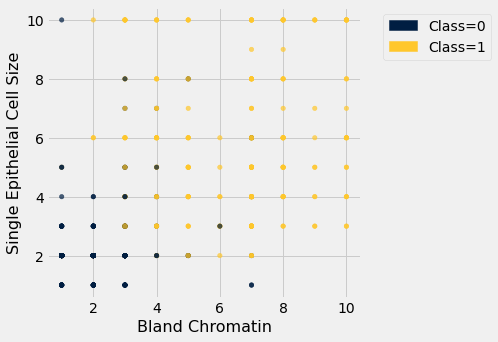

In [4]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

An issue with the data is there are not very many numerical values (they are more like categories/rankings), so there are a lot of repeated data points. The `jittered` table adds some random measurement noise to those data points values. Notice there is not 

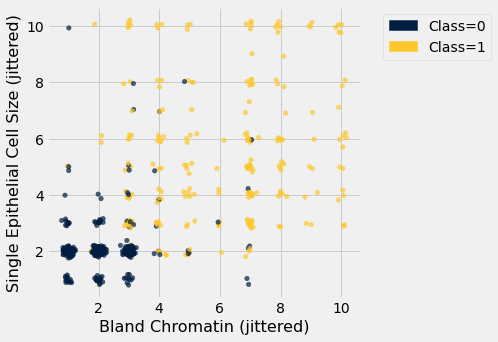

In [5]:
jittered.scatter(0, 1, group='Class')

## Rows

### Rows of Tables

Each row contains all the data for one individual
* `t.row(i)` evaluates to `i`th row of table `t`
* `t.row(i).item(j)` is the value of column `j` in row `i`
* If all values are numbers, then `np.array(t.row(i))` evaluates to an array of all the numbers in the row.  
* To consider each row individually, use
* `for row in t.rows:`
    `... row.item(j) ...`
* `t.exclude(i)` evaluates to the table `t` without its `i`th row


## Distance

### Pythagoras' Formula

<img src="img/lec35_pyth.png" width=20%>

For a right triangle with legs $a, b$ and hypotenuse $c$, the following relationship is always true: $$a^2 + b^2 = c^2.$$


### Distance Between Two Points

One way to calculate the distance between two points utilizes a right triangle and depends on the number of attributes each point has.
* If $D$ represents the distance between points $(x_0, y_0)$ and $(x_1, y_1)$, then $$D = \sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2}$$
* If $D$ represents the distance between points $(x_0, y_0, z_0)$ and $(x_1, y_1, z_1)$, then $$D = \sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2 + (z_0 - z_1)^2}$$
* etc.

### Demo: Distance

Create a function to calculate the distance between 2 points (represented as arrays). Use that function to calculate the distance between two rows of numeric data from a table.

In [6]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

In [7]:
def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

Clean up the `patients` data to be able to apply the `row_distance` function to it.

In [8]:
attributes = patients.drop('Class')
attributes.show(3)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1


In [9]:
row_distance(attributes.row(0), attributes.row(1))

11.874342087037917

In [10]:
row_distance(attributes.row(0), attributes.row(2))

2.23606797749979

In [11]:
row_distance(attributes.row(2), attributes.row(2))

0.0

## Nearest Neighbors

### Finding the `k` Nearest Neighbors

To find the `k` nearest neighbors of an example:
* Find the distance between the example and each example in the training set
* Augment the training data table with a column containing all the distances
* Sort the augmented table in increasing order of the distances
* Take the top `k` rows of the sorted table

### The Classifier

To classify a point:
* Find its `k` nearest neighbors
* Take a majority vote of the `k` nearest neighbors to see which of the two classes appears more often
* Assign the point the class that wins the majority vote

### Demo: The Classifier

The following function calculates the distance between an example row (an individual patient) and every row in the a training set of `patient` data.

In [12]:
def distances(training, example):
    """
    Compute distance between example and every row in training.
    Return training augmented with Distance column
    """
    distances = make_array()
    attributes_only = training.drop('Class')
    
    for row in attributes_only.rows:
        distances = np.append(distances, row_distance(row, example))
    
#   ^ SAME AS DOING:
#
#   for i in np.arange(attributes_only.num_rows):
#       row = attributes_only.row(i)
#       distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

Measure the distance between row 21 and every other row in the data set.

In [13]:
example = attributes.row(21)
example

Row(Clump Thickness=10, Uniformity of Cell Size=5, Uniformity of Cell Shape=5, Marginal Adhesion=3, Single Epithelial Cell Size=6, Bare Nuclei=7, Bland Chromatin=7, Normal Nucleoli=10, Mitoses=1)

In [14]:
distances(patients.exclude(21), example).sort('Distance_to_ex')

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance_to_ex
8,4,4,5,4,7,7,8,2,0,4.3589
10,5,7,4,4,10,8,9,1,1,4.47214
7,4,4,3,4,10,6,9,1,1,5.09902
10,3,6,2,3,5,4,10,2,1,5.38516
10,5,5,6,3,10,7,9,2,1,5.38516
10,6,6,2,4,10,9,7,1,1,5.38516
9,7,7,5,5,10,7,8,3,1,5.56776
10,6,4,3,10,10,9,10,1,1,5.56776
8,7,4,4,5,3,5,10,1,1,5.56776
10,7,7,4,5,10,5,7,2,1,5.74456


Create a function that finds the `k` closest row to the example row. Apply that function to the situation above.

In [15]:
def closest(training, example, k):
    """
    Return a table of the k closest neighbors to example
    """
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))

In [16]:
closest(patients.exclude(21), example, 5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance_to_ex
8,4,4,5,4,7,7,8,2,0,4.3589
10,5,7,4,4,10,8,9,1,1,4.47214
7,4,4,3,4,10,6,9,1,1,5.09902
10,3,6,2,3,5,4,10,2,1,5.38516
10,5,5,6,3,10,7,9,2,1,5.38516


Create a function or functions to report the majority class for the nearest `k` rows to the example row.

In [17]:
closest(patients.exclude(21), example, 5).group('Class').sort('count', descending=True)

Class,count
1,4
0,1


In [19]:
def majority_class(topk):
    """
    Return the class with the highest count
    """
    return topk.group('Class').sort('count', descending=True).column(0).item(0)

In [20]:
def classify(training, example, k):
    """
    Return the majority class among the 
    k nearest neighbors of example
    """
    return majority_class(closest(training, example, k))

In [21]:
classify(patients.exclude(21), example, 5)

1

Apply this technique to other example rows from the data set.

In [22]:
new_example = attributes.row(10)
classify(patients.exclude(10), new_example, 5)

0

In [23]:
patients.take(10)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,1,1,1,1,1,3,1,1,0


In [24]:
another_example = attributes.row(15)
classify(patients.exclude(15), another_example, 5)

0

In [25]:
patients.take(15)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
7,4,6,4,6,1,4,3,1,1


### Review of the Steps

- `distance(pt1, pt2)`: Returns the distance between the arrays `pt1` and `pt2`
- `row_distance(row1, row2)`: Returns the distance between the rows `row1` and `row2`
- `distances(training, example)`: Returns a table that is `training` with an additional column `'Distance'` that contains the distance between `example` and each row of `training`
- `closest(training, example, k)`: Returns a table of the rows corresponding to the k smallest distances 
- `majority_class(topk)`: Returns the majority class in the `'Class'` column
- `classify(training, example, k)`: Returns the predicted class of `example` based on a `k` nearest neighbors classifier using the historical sample `training`

## Evaluation

### Accuracy of a Classifier

* The accuracy of a classifier on a labeled data set is the proportion of examples that are labeled correctly
* Need to compare classifier predictions to true labels
* If the labeled data set is sampled at random from a population, then we can infer accuracy on that population

<img src="img/lec35_train_test_split.png" width=50%>

### Demo: Accuracy of a Classifier

Split up the `patients` data into two tables where approximately 80% of the data is used for training and 20% is used for testing.

In [26]:
round(patients.num_rows * 0.8)

546

In [27]:
shuffled = patients.sample(with_replacement=False) # Randomly permute the rows
training_set = shuffled.take(np.arange(round(patients.num_rows * 0.8)))
# above gets the first 546 rows from the shuffled table
# below gets the rows starting from #546 to the end of the suffled table
test_set  = shuffled.take(np.arange(round(patients.num_rows * 0.8), patients.num_rows))

Create a function that evaluates the accuracy by returning the proportion of correctly classified examples in the test set.

In [28]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [29]:
evaluate_accuracy(training_set, test_set, 5)

0.9562043795620438

In [30]:
evaluate_accuracy(training_set, test_set, 3)

0.9708029197080292

In [31]:
evaluate_accuracy(training_set, test_set, 11)

0.9562043795620438

## Before Classifying

### Dog or Wolf?

<img src="img/lec35_dog_wolf.png" width=80%>

### Start with a Representative Sample

* Both the training and test sets must accurately represent the population on which you use your classifier
* Overfitting happens when a classifier does very well on the training set, but can't do as well on the test set

### Standardize if Necessary

In [32]:
Table().with_columns(
    'Glucose', make_array(117, 70, 380, 157),
    'Hemoglobin', make_array(11.2, 9.5, 10.8, 5.6),
    'White Blood Cell Count', make_array(6700, 12100, 4500, 11000),
    'Class', make_array(1, 1, 1, 1)
)

Glucose,Hemoglobin,White Blood Cell Count,Class
117,11.2,6700,1
70,9.5,12100,1
380,10.8,4500,1
157,5.6,11000,1


* If the attributes are on very different numerical scales, distance can be affected
* In such a situation, it is a good idea to convert all the variables to standard units 

### Demo: Standardize if Necessary

Explore what can happen to the classifier's accuracy when the units are not standardized.

In [33]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

In [34]:
ckd_new = ckd.select('Class').with_columns(
    'Glucose_su', standard_units(ckd.column('Glucose')),
    'Hemoglobin_su', standard_units(ckd.column('Hemoglobin')),
    'WBC_su', standard_units(ckd.column('White Blood Cell Count'))
)

In [35]:
ckd_new

Class,Glucose_su,Hemoglobin_su,WBC_su
1,-0.221549,-0.865744,-0.569768
1,-0.947597,-1.45745,1.16268
1,3.84123,-1.00497,-1.27558
1,0.396364,-2.81488,0.809777
1,0.643529,-2.08395,0.232293
1,-0.561402,-1.35303,-0.505603
1,2.04928,-0.413266,0.360623
1,-0.947597,-1.28342,3.34429
1,1.87936,-1.10939,-0.409356
1,0.489051,-1.35303,1.96475


In [36]:
shuffled = ckd_new.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [37]:
evaluate_accuracy(training_set, test_set, 3)

0.9459459459459459

In [38]:
shuffled = ckd.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [39]:
evaluate_accuracy(training_set, test_set, 3)

0.8378378378378378

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>